# Student grades prediction

## Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

## Importing Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

## Understanding the Data

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.21
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.01
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.61
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.91
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [5]:
df.describe()

,CGPA
count,571.00
mean,2.95
std,0.62
min,0.80
25%,2.54
50%,3.03
75%,3.45
max,3.98


In [6]:
df.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

In [7]:
df['CGPA'].value_counts()

3.02    5
3.06    3
2.79    3
3.44    3
2.21    3
       ..
2.56    1
2.04    1
2.63    1
2.05    1
1.75    1
Name: CGPA, Length: 491, dtype: int64

In [8]:
df['PH-121'].value_counts()

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

## Preparation of the Data

In [9]:
df = df.drop(['Seat No.'], axis=1)

In [10]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.isnull().any()

PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
MT-442       False
EL-332       False
CS-318       False
CS-306       False
CS-312       False
CS-317       False
CS-403       False
CS-421       False
CS-406       False
CS-414       False
CS-419       False
CS-423       False
CS-412       False
CGPA         False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

## Understanding Features

  0%|          | 0/40 [00:00<?, ?it/s]

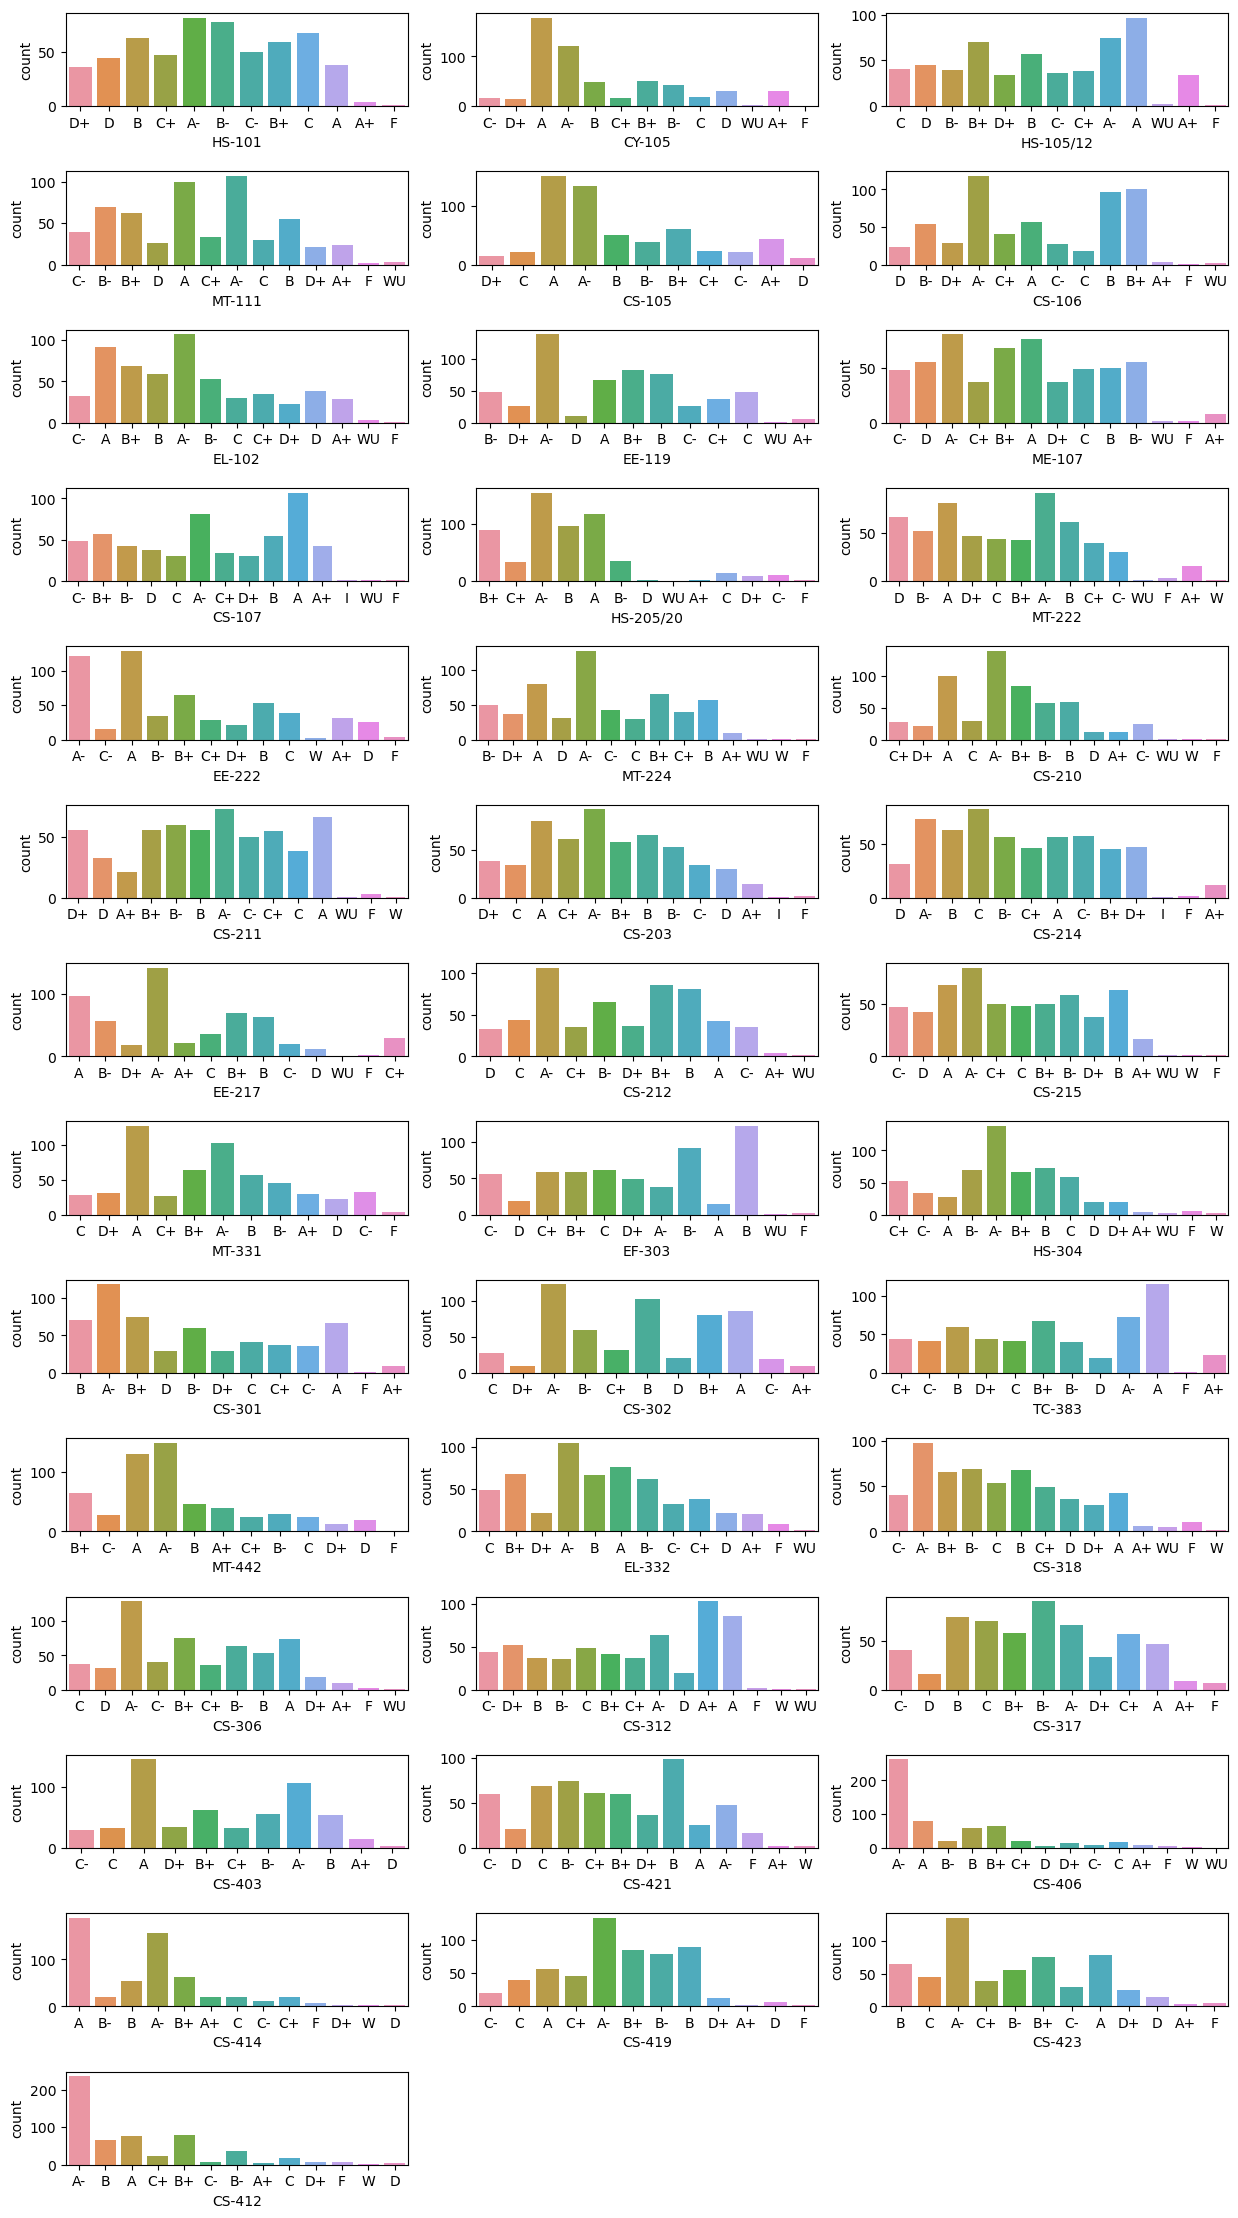

In [13]:
plt.figure(figsize=(15, 30))
p = 1
for col in tqdm(df.columns[1:-1]):
    if p <= 45:
        plt.subplot(15, 3, p)
        sns.countplot(x=col, data=df)
        p += 1
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [14]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.00,10.00,8.00,6.00,8.00,10.00,9.00,8.00,5.00,8.00,...,8.00,8.00,8.00,8.00,2.00,0.00,8.00,3.00,2.00,2.21
1,0.00,9.00,10.00,9.00,5.00,6.00,9.00,0.00,10.00,9.00,...,10.00,9.00,6.00,9.00,2.00,5.00,6.00,6.00,3.00,2.01
2,0.00,3.00,0.00,5.00,4.00,0.00,5.00,4.00,2.00,2.00,...,3.00,3.00,0.00,6.00,0.00,0.00,0.00,2.00,0.00,3.61
3,9.00,7.00,10.00,9.00,9.00,2.00,10.00,8.00,9.00,7.00,...,10.00,6.00,10.00,8.00,5.00,3.00,7.00,7.00,7.00,1.91
4,2.00,2.00,2.00,4.00,0.00,0.00,2.00,4.00,0.00,2.00,...,5.00,4.00,4.00,5.00,2.00,0.00,2.00,2.00,0.00,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.00,0.00,0.00,2.00,1.00,0.00,2.00,2.00,1.00,4.00,...,2.00,2.00,0.00,0.00,0.00,4.00,4.00,3.00,0.00,3.80
567,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,...,4.00,4.00,0.00,0.00,2.00,3.00,2.00,6.00,2.00,3.77
568,3.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,0.00,3.00,...,2.00,3.00,0.00,4.00,0.00,6.00,4.00,2.00,2.00,3.47
569,0.00,4.00,9.00,0.00,9.00,10.00,5.00,8.00,5.00,8.00,...,9.00,3.00,3.00,8.00,9.00,6.00,3.00,5.00,6.00,2.19


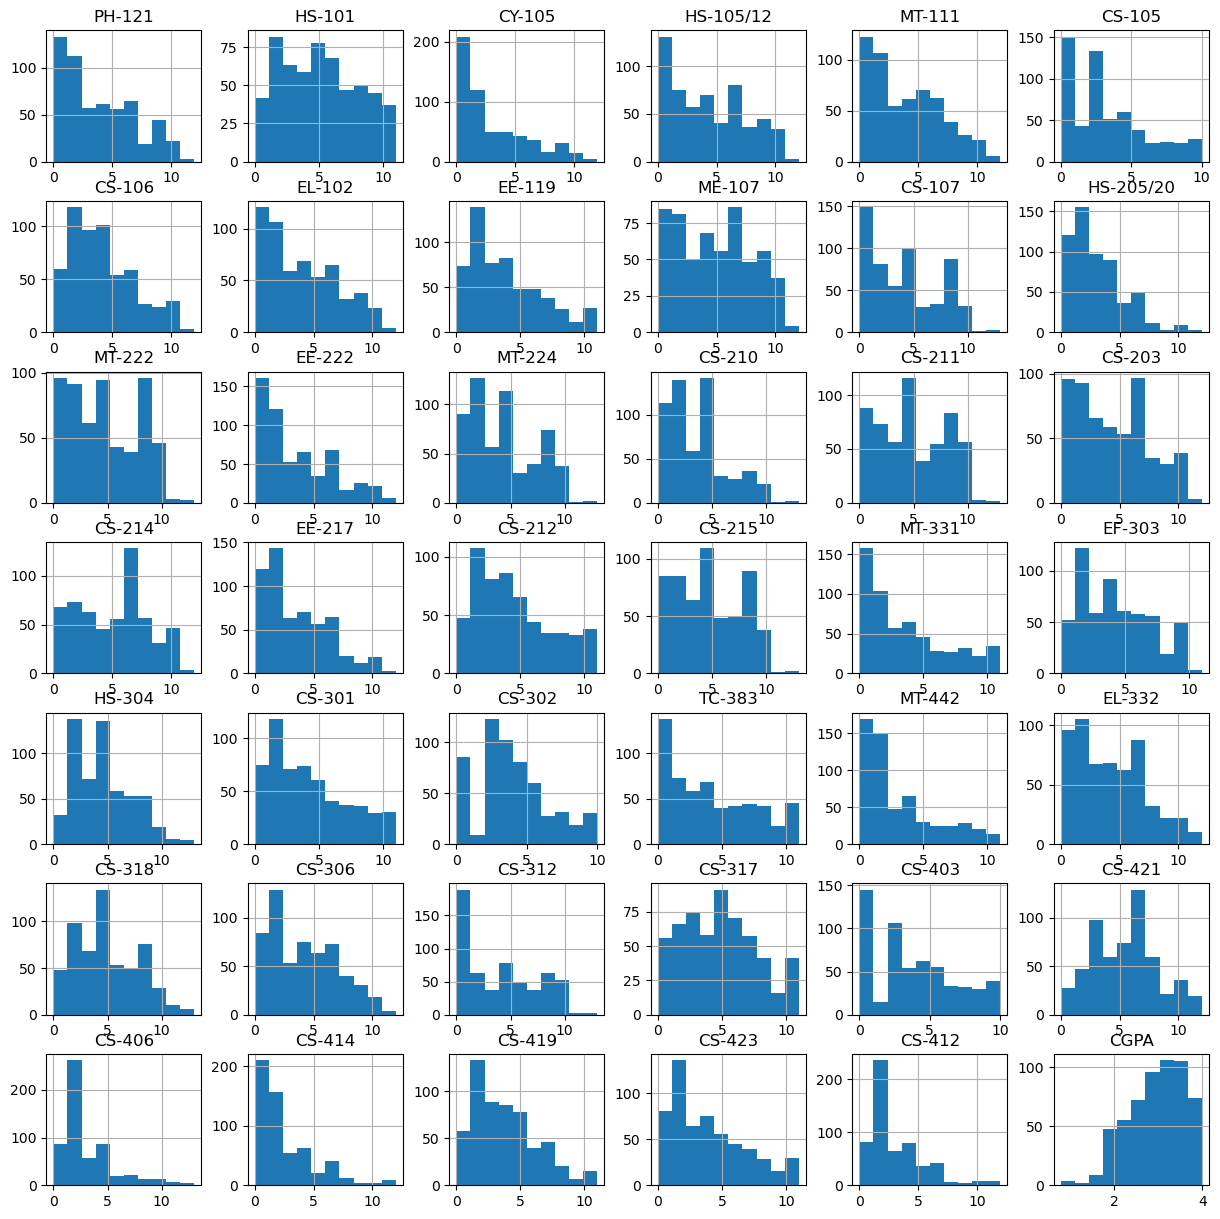

In [15]:
df.hist(bins=10,figsize=(15,15));

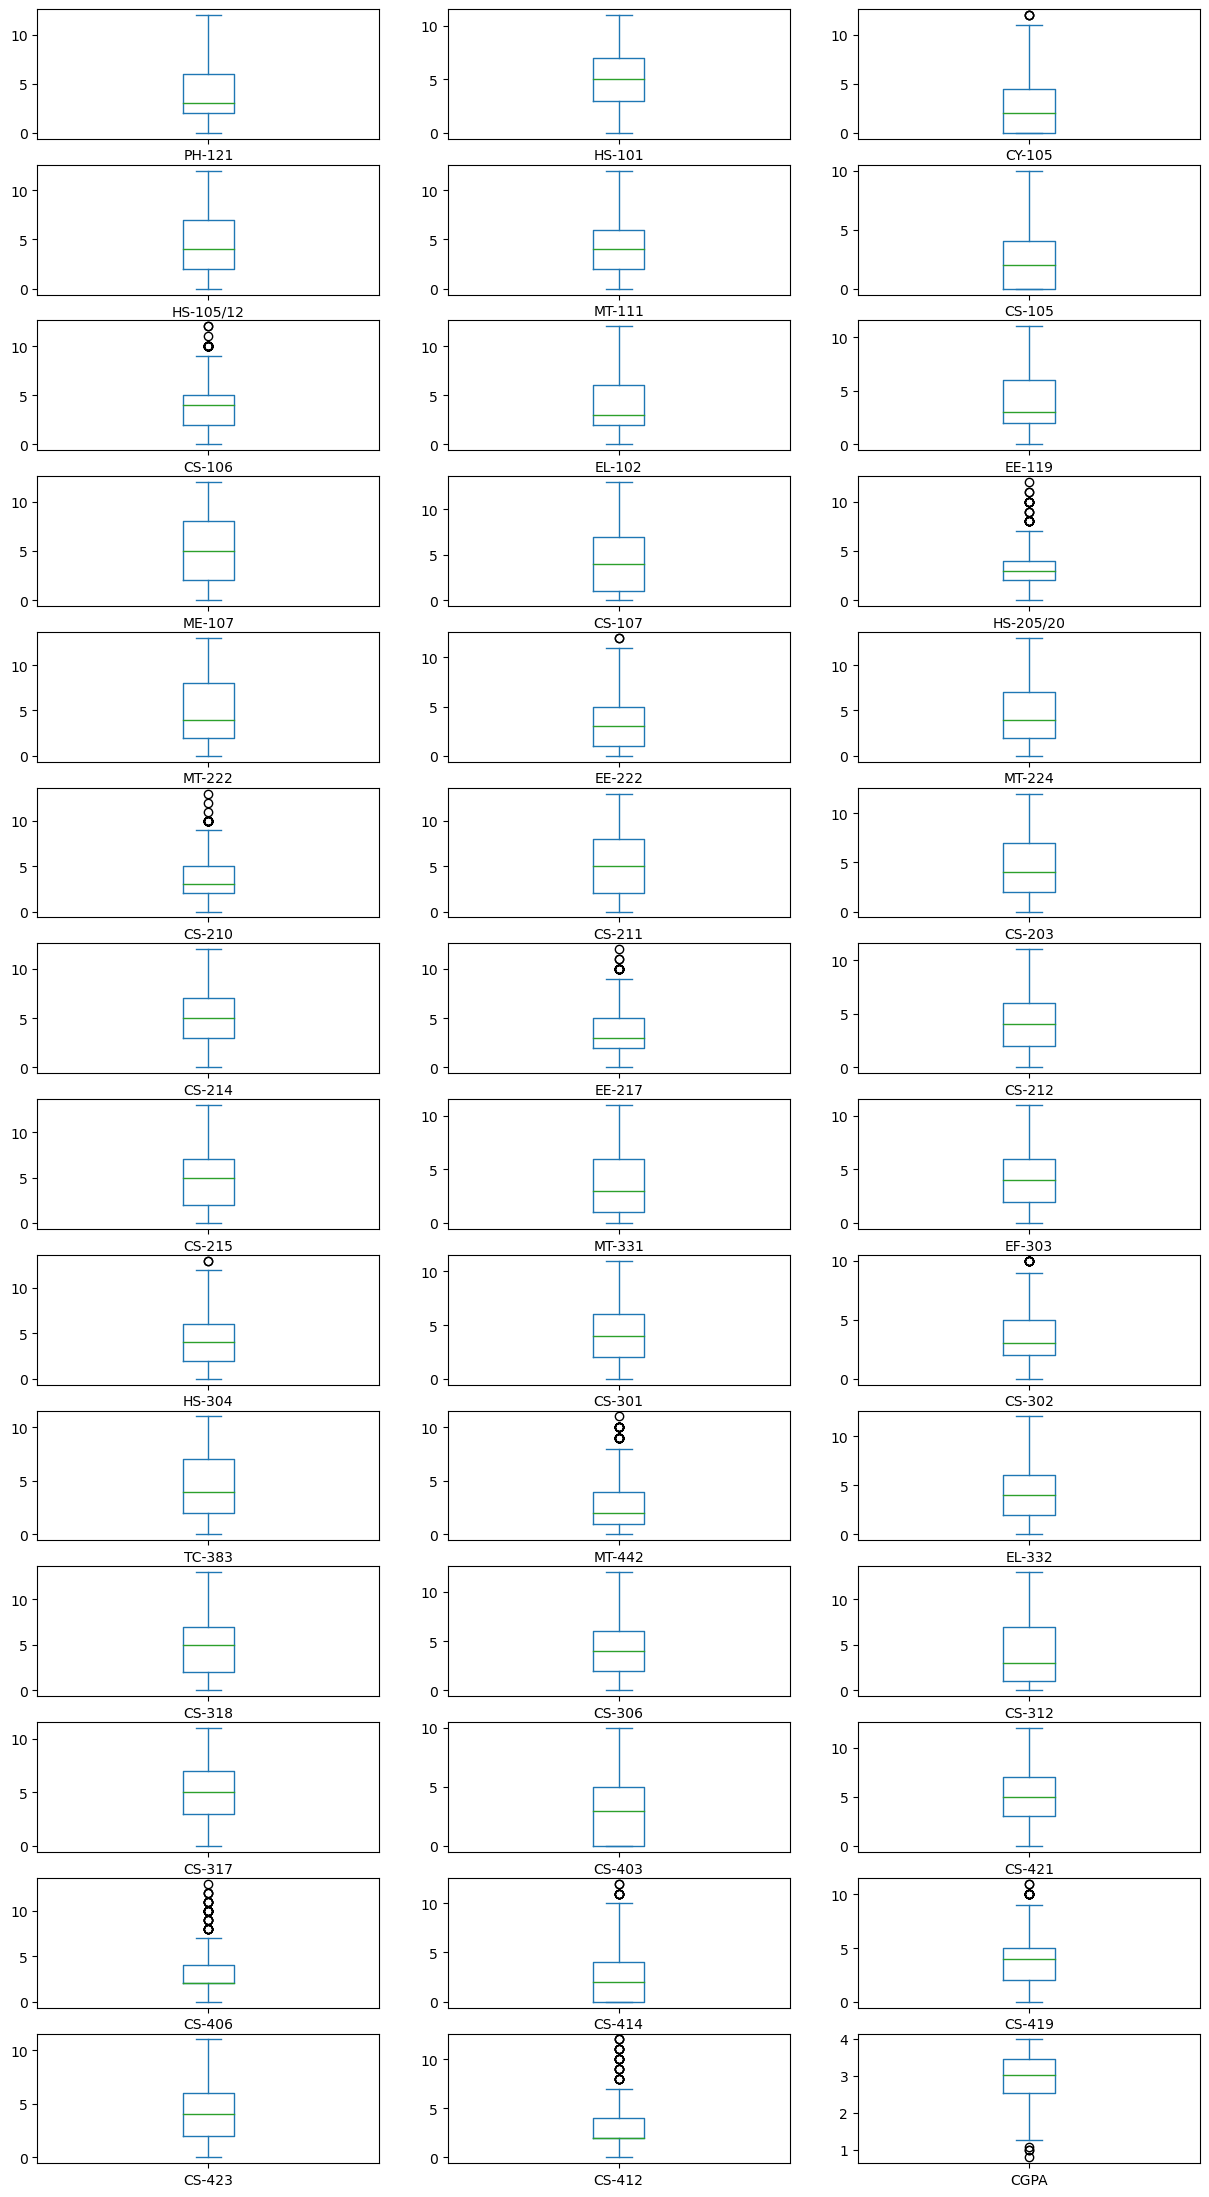

In [16]:
df.plot(kind='box',subplots=True,layout=(15,3),figsize=(15,30));

  0%|          | 0/571 [00:00<?, ?it/s]

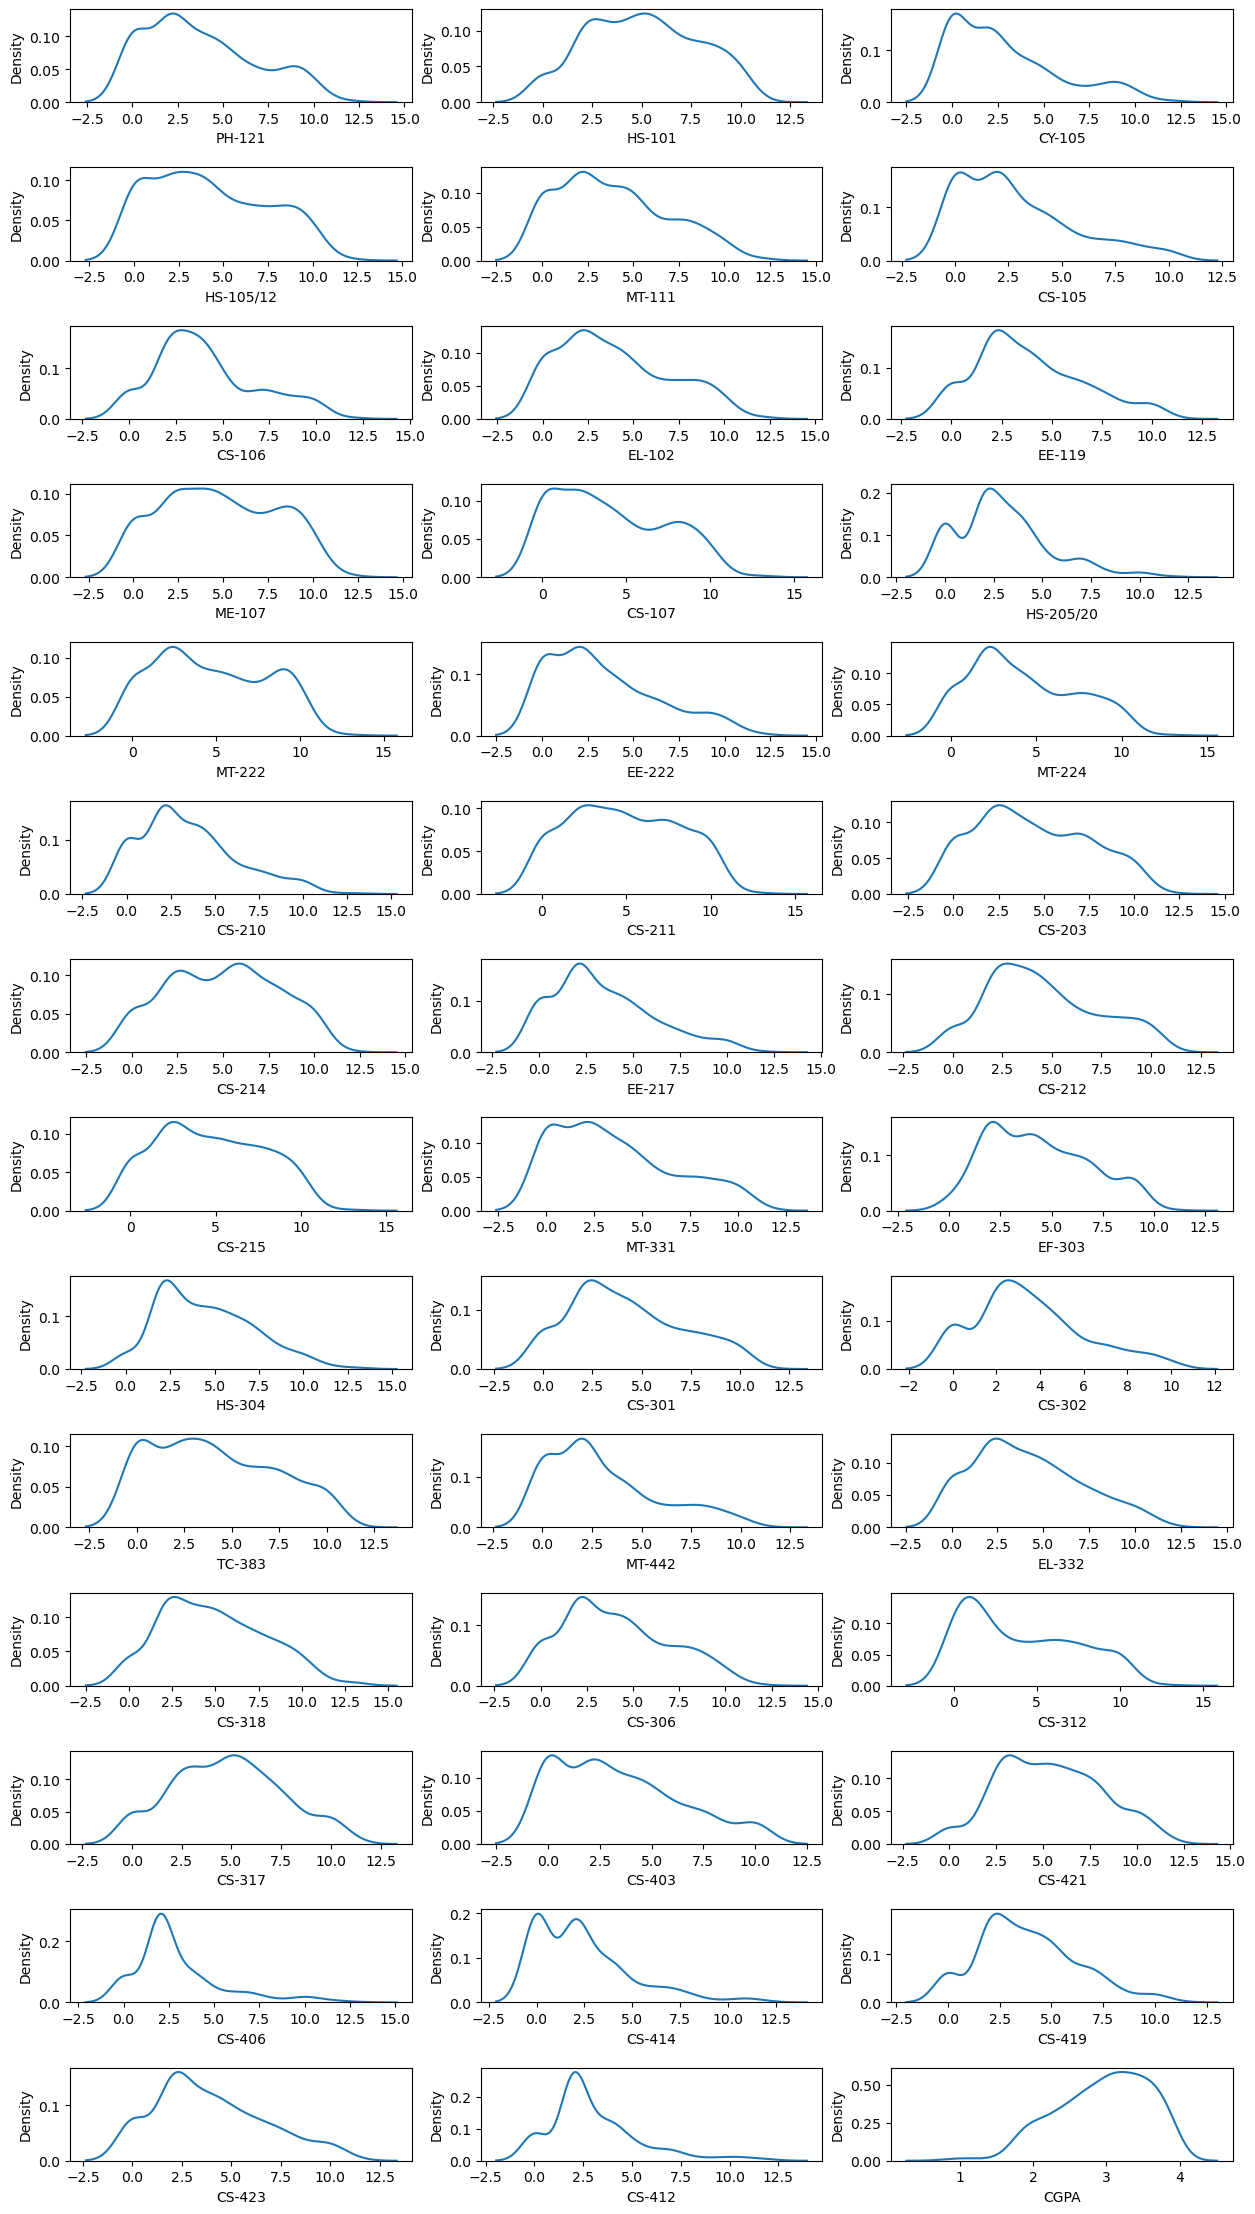

In [17]:
plt.figure(figsize=(15, 30))
p = 1
for col in tqdm(df):
    if p <= 45:
        plt.subplot(15, 3, p)
        sns.kdeplot(df[col])
        p += 1
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

## Understanding Feature Relationships

In [18]:
#sns.pairplot(df, palette="Dark2", hue='CGPA');

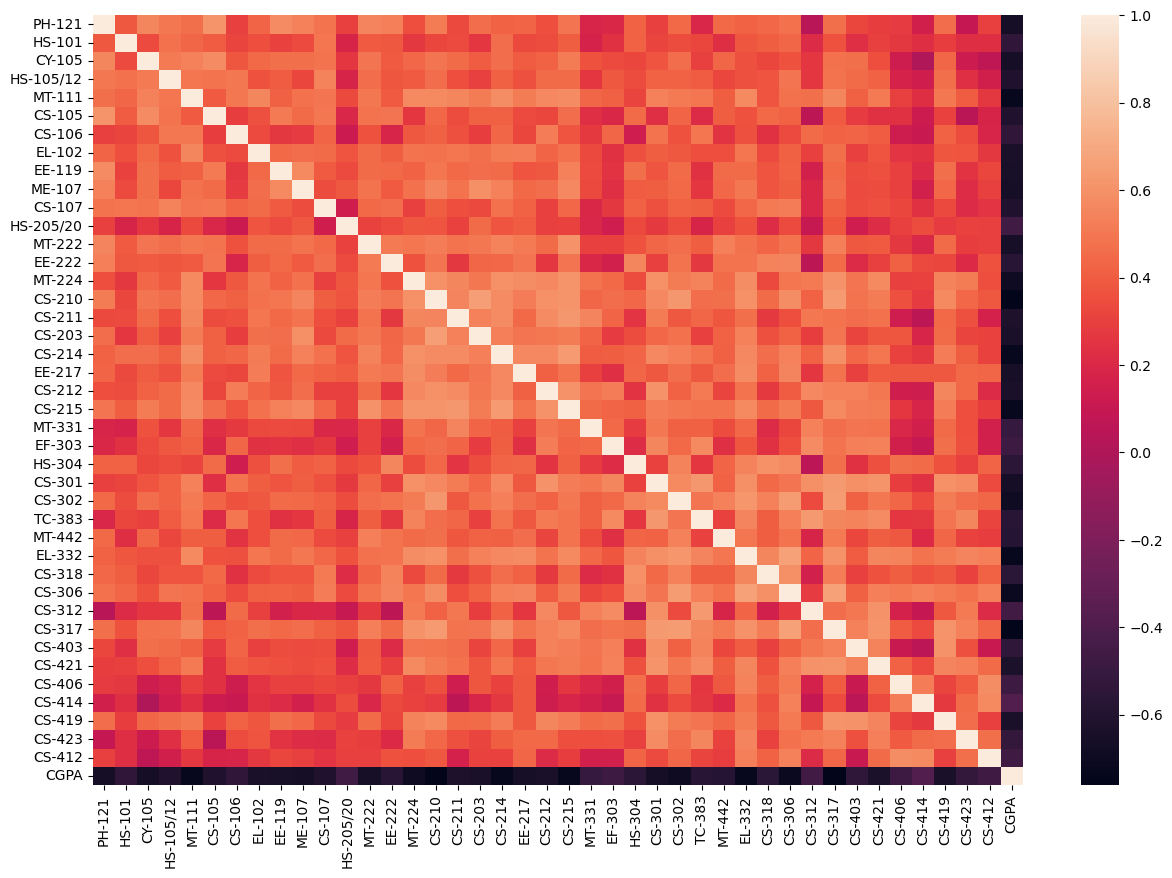

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=False);

In [20]:
pd.set_option('display.max_columns', 50)
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.00,0.38,0.56,0.50,0.47,0.61,0.29,0.42,0.58,0.53,0.48,0.30,0.55,0.53,0.35,0.51,0.33,0.46,0.42,0.42,0.35,0.49,0.18,0.20,0.42,0.30,0.45,0.19,0.44,0.42,0.44,0.47,0.04,0.46,0.32,0.29,0.28,0.15,0.46,0.09,0.29,-0.66
HS-101,0.38,1.00,0.34,0.47,0.43,0.40,0.31,0.35,0.31,0.34,0.50,0.18,0.39,0.38,0.27,0.32,0.34,0.26,0.46,0.33,0.34,0.40,0.17,0.24,0.42,0.31,0.35,0.32,0.23,0.38,0.40,0.43,0.21,0.36,0.23,0.30,0.27,0.23,0.28,0.23,0.23,-0.54
CY-105,0.56,0.34,1.00,0.51,0.54,0.58,0.38,0.45,0.47,0.46,0.48,0.26,0.49,0.39,0.44,0.49,0.45,0.40,0.46,0.40,0.42,0.51,0.37,0.33,0.32,0.37,0.46,0.30,0.43,0.35,0.32,0.36,0.26,0.47,0.46,0.35,0.13,0.01,0.43,0.12,0.06,-0.66
HS-105/12,0.50,0.47,0.51,1.00,0.49,0.48,0.50,0.36,0.40,0.32,0.54,0.18,0.46,0.38,0.39,0.46,0.35,0.30,0.41,0.36,0.46,0.45,0.26,0.38,0.35,0.42,0.42,0.40,0.32,0.35,0.37,0.48,0.26,0.48,0.45,0.42,0.17,0.14,0.47,0.24,0.15,-0.61
MT-111,0.47,0.43,0.54,0.49,1.00,0.39,0.50,0.56,0.41,0.47,0.49,0.33,0.50,0.39,0.57,0.57,0.56,0.51,0.59,0.51,0.57,0.58,0.43,0.41,0.32,0.54,0.51,0.49,0.40,0.57,0.37,0.47,0.47,0.56,0.41,0.51,0.30,0.23,0.50,0.40,0.27,-0.73
CS-105,0.61,0.40,0.58,0.48,0.39,1.00,0.29,0.35,0.51,0.46,0.50,0.19,0.48,0.49,0.26,0.44,0.34,0.41,0.41,0.34,0.32,0.46,0.23,0.20,0.46,0.23,0.43,0.21,0.41,0.36,0.44,0.42,0.06,0.39,0.28,0.24,0.24,0.12,0.31,0.05,0.18,-0.61
CS-106,0.29,0.31,0.38,0.50,0.50,0.29,1.00,0.34,0.27,0.28,0.42,0.12,0.36,0.19,0.38,0.41,0.36,0.28,0.43,0.32,0.52,0.37,0.27,0.43,0.14,0.48,0.36,0.50,0.25,0.36,0.24,0.34,0.45,0.42,0.43,0.40,0.13,0.11,0.42,0.34,0.19,-0.53
EL-102,0.42,0.35,0.45,0.36,0.56,0.35,0.34,1.00,0.45,0.46,0.45,0.37,0.45,0.40,0.48,0.48,0.49,0.47,0.51,0.52,0.42,0.47,0.33,0.24,0.36,0.41,0.39,0.35,0.35,0.49,0.34,0.41,0.30,0.47,0.30,0.37,0.25,0.24,0.38,0.37,0.27,-0.64
EE-119,0.58,0.31,0.47,0.40,0.41,0.51,0.27,0.45,1.00,0.57,0.39,0.34,0.46,0.44,0.42,0.49,0.45,0.46,0.45,0.37,0.39,0.54,0.34,0.25,0.46,0.37,0.45,0.24,0.45,0.45,0.37,0.42,0.16,0.45,0.34,0.36,0.30,0.21,0.47,0.24,0.32,-0.65
ME-107,0.53,0.34,0.46,0.32,0.47,0.46,0.28,0.46,0.57,1.00,0.34,0.38,0.48,0.39,0.47,0.55,0.48,0.59,0.54,0.45,0.46,0.57,0.33,0.24,0.40,0.41,0.44,0.26,0.44,0.50,0.37,0.40,0.20,0.46,0.34,0.35,0.30,0.15,0.44,0.22,0.29,-0.66


  0%|          | 0/571 [00:00<?, ?it/s]

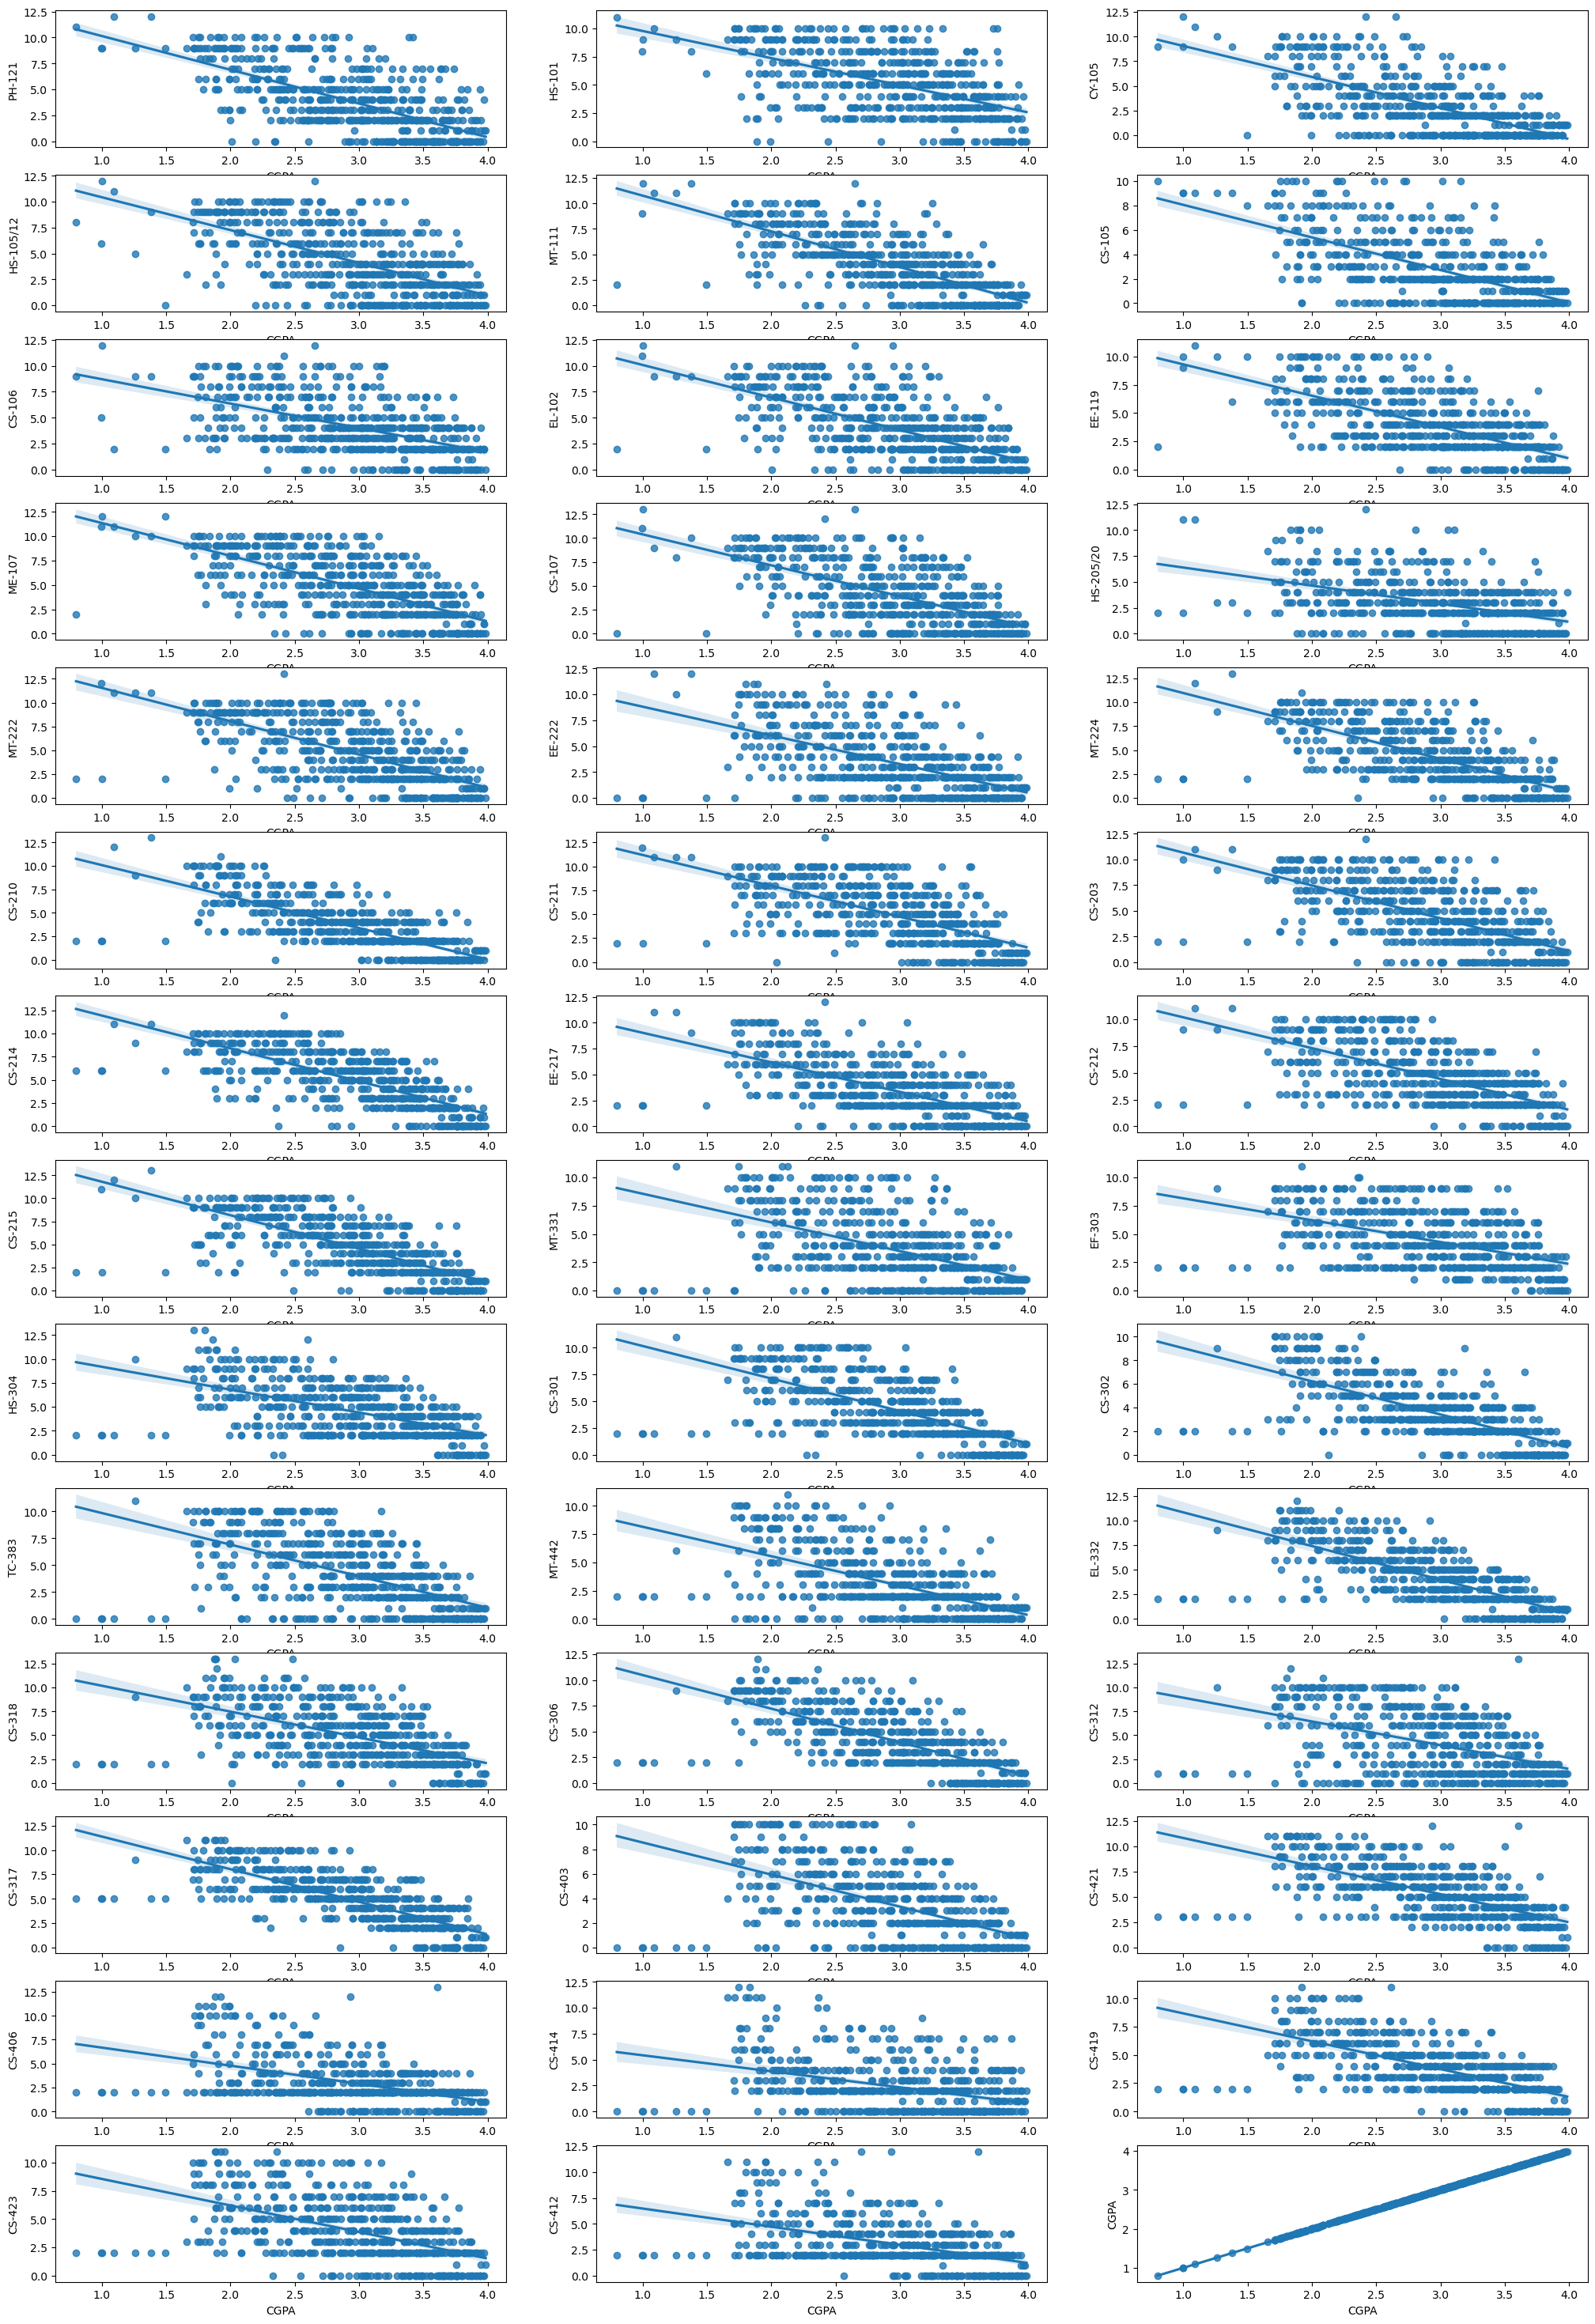

In [21]:
plt.figure(figsize=(25,40))
p=1
for i in tqdm(df):
    if p<=45:
        plt.subplot(15,3,p)
        sns.regplot(x='CGPA', y=i, data=df)
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation

In [22]:
df_skew = df.skew()
df_skew

PH-121       0.55
HS-101       0.05
CY-105       0.98
HS-105/12    0.32
MT-111       0.48
CS-105       0.93
CS-106       0.64
EL-102       0.50
EE-119       0.57
ME-107       0.11
CS-107       0.41
HS-205/20    0.90
MT-222       0.19
EE-222       0.76
MT-224       0.43
CS-210       0.72
CS-211       0.12
CS-203       0.27
CS-214       0.01
EE-217       0.72
CS-212       0.41
CS-215       0.16
MT-331       0.63
EF-303       0.38
HS-304       0.54
CS-301       0.42
CS-302       0.60
TC-383       0.33
MT-442       0.87
EL-332       0.46
CS-318       0.36
CS-306       0.42
CS-312       0.44
CS-317       0.14
CS-403       0.62
CS-421       0.18
CS-406       1.52
CS-414       1.29
CS-419       0.51
CS-423       0.53
CS-412       1.33
CGPA        -0.50
dtype: float64

In [23]:
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])
df.skew()

PH-121      -0.92
HS-101       0.05
CY-105      -0.40
HS-105/12    0.32
MT-111       0.48
CS-105      -0.58
CS-106      -1.50
EL-102      -1.06
EE-119      -1.39
ME-107       0.11
CS-107       0.41
HS-205/20   -1.00
MT-222       0.19
EE-222      -0.74
MT-224       0.43
CS-210      -1.06
CS-211       0.12
CS-203       0.27
CS-214       0.01
EE-217      -1.05
CS-212       0.41
CS-215       0.16
MT-331      -0.77
EF-303       0.38
HS-304      -1.68
CS-301       0.42
CS-302      -1.27
TC-383       0.33
MT-442      -0.71
EL-332       0.46
CS-318       0.36
CS-306       0.42
CS-312       0.44
CS-317       0.14
CS-403      -0.71
CS-421       0.18
CS-406      -1.11
CS-414      -0.38
CS-419      -1.65
CS-423      -1.29
CS-412      -1.25
CGPA        -0.50
dtype: float64

In [24]:
x = df.drop(['CGPA'], axis=1)
y = df[['CGPA']]

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,9.06,PH-121
1,7.53,HS-101
2,6.22,CY-105
3,6.09,HS-105/12
4,6.68,MT-111
5,6.10,CS-105
6,10.87,CS-106
7,8.68,EL-102
8,13.66,EE-119
9,7.59,ME-107


In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [27]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

## Model Creation

In [28]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:16<00:00,  2.48it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 428, number of used features: 41
[LightGBM] [Info] Start training from score 2.940460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## Model Evaluation

In [1]:
gb_clf = GradientBoostingRegressor(random_state=39)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
gb_clf.fit(xtrain,ytrain)

In [ ]:
ypred = gb_clf.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

In [ ]:
gb_clf.score(xtrain,ytrain)

In [ ]:
from sklearn.metrics import mean_squared_error
err = [mean_squared_error(ytest,ypred) for ypred in gb_clf.staged_predict(xtest)]

In [ ]:
bst_est = np.argmin(err)

In [ ]:
Final_model = GradientBoostingRegressor(n_estimators=bst_est,max_depth=3)

In [ ]:
Final_model.fit(xtrain,ytrain)

In [ ]:
Final_model.score(xtest,ytest)